In [94]:
import pandas as pd

In [95]:
train =  pd.read_csv('fake_news_train.csv')

In [96]:
test = pd.read_csv('fake_news_test.csv')

In [97]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [98]:
features = train.drop('label', axis = 1)

In [99]:
y = train['label']

In [100]:
texts1 = features.copy()

In [101]:
texts = texts1.dropna()          #removing null values

In [102]:
texts.head(10)

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi..."
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi..."
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that..."
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...


In [103]:
texts.reset_index(inplace = True)      #resetting index after removing null values

In [70]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [72]:
corpus = []
for i in range(0, len(texts)):
    review = re.sub('[^a-zA-Z]', ' ', texts['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer

## TFIDF Vectorizer

In [76]:
tfdf = TfidfVectorizer(max_features = 5000, ngram_range = (1,3))
X = tfdf.fit_transform(corpus).toarray()

In [106]:
train1 = train.dropna()

In [113]:
Y = train1['label']

In [115]:
X.shape, Y.shape

((18285, 5000), (18285,))

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 1)

In [117]:
tfdf.get_feature_names()[:30]

['aaron',
 'abandon',
 'abc',
 'abe',
 'abedin',
 'abil',
 'abl',
 'abort',
 'abroad',
 'absenc',
 'absolut',
 'absorb',
 'absurd',
 'abu',
 'abus',
 'academ',
 'academi',
 'acceler',
 'accept',
 'access',
 'access pipelin',
 'accid',
 'accommod',
 'accompani',
 'accomplish',
 'accord',
 'accord report',
 'account',
 'accumul',
 'accur']

In [118]:
tfdf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [121]:
tfdf_df = pd.DataFrame(X_train, columns = tfdf.get_feature_names())
tfdf_df.head(10)

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.030988,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.009193,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.014377,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.031061,0.0,0.0,0.0,...,0.000000,0.0,0.093966,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
from sklearn.naive_bayes import MultinomialNB
Classifier = MultinomialNB()

In [126]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [127]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:  0.9017398508699255
Confusion matrix, without normalization


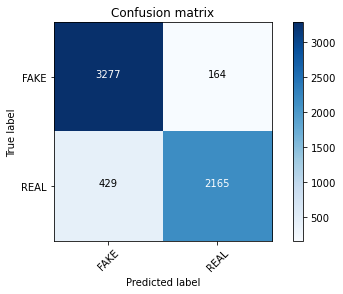

In [131]:
import numpy as np
import itertools



Classifier.fit(X_train, Y_train)
preds = Classifier.predict(X_test)
print('accuracy: ', accuracy_score(Y_test, preds))
matrix = confusion_matrix(Y_test, preds)
plot_confusion_matrix(matrix, classes = ['FAKE', 'REAL'])

In [132]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter = 50)

accuracy_:  0.9526097763048882
Confusion matrix, without normalization


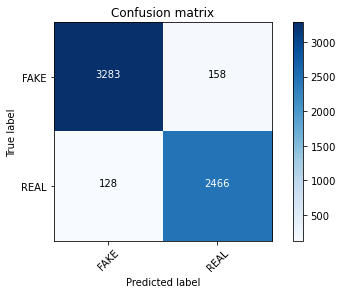

In [135]:
linear_clf.fit(X_train, Y_train)
pred = linear_clf.predict(X_test)
print('accuracy_: ', accuracy_score(Y_test, pred))
matrix = confusion_matrix(Y_test, pred)
plot_confusion_matrix(matrix, classes = ['FAKE', 'REAL'])

In [139]:
classifier1 = MultinomialNB(alpha = 0.1)

## Hashing Vectorizer

In [143]:
from sklearn.feature_extraction.text import HashingVectorizer

In [149]:
hv = HashingVectorizer(n_features = 5000, ngram_range = (1,3))

In [150]:
x = hv.fit_transform(corpus).toarray()

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, Y, test_size = 0.33, random_state = 1)

In [156]:
linear_clf.fit(x_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [157]:
hash_preds = linear_clf.predict(x_test)

accuracy, using HashinhVectorizer:  0.9133388566694284
Confusion matrix, without normalization


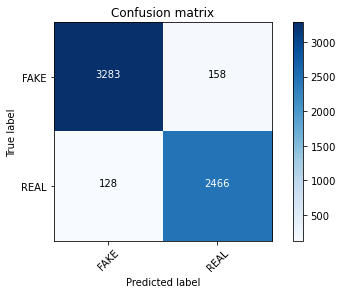

In [159]:
print('accuracy, using HashinhVectorizer: ', accuracy_score(y_test, hash_preds))
matrix1 = confusion_matrix(y_test, pred)
plot_confusion_matrix(matrix1, classes = ['FAKE', 'REAL'])